# Práctica 2: Ipyhton notebook con pruebas, resultados y análisis

<br>**Asignatura:** Prácticas de Fundamentos de Aprendizaje Automático</br>
<br>**Autores:** Albert Soler y Alfonso Sebares</br>

------------------------------------

### Notas relevantes:
* Para poder manejar los notebook con Jupyter se ha seguido la [recomendación](http://jupyter.readthedocs.io/en/latest/install.html) de instalar Anaconda junto a su gestor de paquetes 'conda', en la línea de al práctica 0. Sin embargo, la version del módulo `sklearn` incluída por defecto es la 0.17. Dado que algunos módulos que hemos utilizado, como [sklearn.model_selection](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection), sólo se encuentran en la versión 0.18 en adelante, sería necesario actualizar el módulo para el correcto funcionamiento de las pruebas dentro del notebook en caso de tener problemas. Bastaría con los siguientes comandos para actualizar el módulo: 
```
conda update conda
conda install scikit-learn=0.18
```
* Si se ejecuta el programa directamente sobre el intérprete de python de la máquina, también será imprescindible la versión 0.18 o más para el correcto funcionamiento de las pruebas scikit-learn.
* Por comodidad, dado que la llamada a `plotModel` se hace a nivel interno en nuestro código, se han incluído aparte las plots generadas para las pruebas descritas en vez de hacerse de forma interactiva. Dichas plots se guardan al generarse en la carpeta **PlotsGenerados**.
* El archivo `testApartado2.py` tiene un tiempo de ejecución bastante largo (del orden de varios minutos) si se hace con el conjunto `digits.data` y la generación de las gráficas (que añade una sobrecarga considerable). Para lidiar con esto, se recomienda o bien limitar las pruebas de este conjunto de datos o bien comentar la línea 119 de `Main.py`:
```
 plotModel(dataset.datos[ii, 0], dataset.datos[ii, 1], dataset.datos[ii, -1] != 0, clasificador, "Frontera", plotName)
```
* Aunque no es la solución óptima, se incluye el fichero `run_completo_apartado2.txt` con una ejecución completa de `testapartado2.py` del Apartado 2 en caso de que lleve mucho ejecutar la prueba.

------------------------------------

### Qué hay en este notebook:

De manera estructurada por los apartados especificados con respecto al Ipython Notebook, se incluyen las instrucciones necesarias para realizar las pruebas descritas en el apartado 2 del enunciado, así como una breve descripción y análisis de dichas pruebas.

Además de presentarse cada prueba en una celda para analizar el resultado de manera independiente, se incluye en cada apartado una tabla con los resultados de toda la prueba, a modo de análisis comparativo.

------------------------------------

### Índice:
1. **Apartado 1**
    1. tic-tac-toe - NaiveBayes
    2. tic-tac-toe - NaiveBayes, Laplace
    3. wine_proc - NaiveBayes
    4. wine_proc - NaiveBayes, Laplace
    5. crx - NaiveBayes
    6. crx - NaiveBayes, Laplace
    7. crx_clean - NaiveBayes
    8. crx_clean - NaiveBayes, Laplace
    9. digits - NaiveBayes
    10. digits - NaiveBayes, Laplace <br><br>
2. **Apartado 2 - Vecinos Próximos**
    1. example3
    2. example3, normalizar
    3. example4
    4. example4, normalizar
    5. wine_proc
    6. wine_proc, normalizar
    7. wdbc
    8. wdbc, normalizar
    9. digits
    10. digits, normalizar<br><br>
3. **Apartado 3 - Regresión Logística**
    1. example3
    2. example3, normalizar
    3. example4
    4. example4, normalizar
    5. wdbc
    6. wdbc, normalizar
    7. wine
    8. wine, normalizar
    9. digits
    10. digits, normalizar
------------------------------------

Primero definimos el path para que el notebook pueda utilizar los archivos de código fuente y a continuación realizamos los imports necesarios:

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from IPython.display import Image

from Main import Main
from EstrategiaParticionado import ValidacionCruzada

#Apartado1
from Clasificador import ClasificadorNaiveBayes
#Apartado2
from Clasificador import ClasificadorVecinosProximos
#Apartado3
from Clasificador import ClasificadorRegresionLogistica, ClasificadorMulticlase

### Apartado 1
Resultados de Naive-Bayes obtenidos por scikit-learn en los conjuntos de datos de la práctica 1 y análisis comparativo con los resultados obtenidos por la propia implementación en python.

Validación cruzada para 10 folds, resultados como **media de errores (%)**:

|            |Naive-bayes    |Naive-bayes <br>sklearn   | Naive-bayes<br>Laplace | Naive-bayes<br>Laplace,skelarn|
|------------|:-----------:|:-------------------:|:----------------------:|:-----------------------------:|
| tic-tac-toe|30.38|34.38|30.68|34.34|
| wine_proc  |61.20|3.83|61.76|3.83|
| crx        |49.85|17.39|49.27|17.38|
| crx_clean  |48.99|17.15|49.76|17.15|
| digits     |91.80|46.88|91.38|46.88|

Comparando los resultados de nuestra implementación con scikit-learn, llegamos a las siguientes conlusiones:
* **tic-tac-toe:** Sn duda es el set de datos en el que más se corresponde nuestra implementación con la de sklearn. Por una parte, todos los atributos son nominales, con lo que en nuestra implementación nos despreocupamos si los los atributos continuos seguirán una distribución normal. Por otra parte, el clasificador usado en la función de sklearn es MultiNomialNB(). De esta forma tiene sentido que los datos se ajusten a una distribución multinomial, ya que estamos contando apariciones en nuestra función implementada al fin y al cabo. Por útimo, como ya comentamos en el anterior Notebook, influye poco el uso de la corrección de Laplace dado que no hay casos que no estén contemplados ( influye en la predicción).
* **wine_proc:** Aquí sí podemos ver que GaussianNB() trabaja mejor que nuestro clasificador, con una diferencia de errores en las predicciones más que notable. Aparte de que está diseñado específicamente para atributos continuos, el clasificador de sklearn calibra la media y desviación típica en su algoritmo en función de los atributos, obteniendo mejores resultados. No obstante, la media de errores que obtenemos sigue siendo anormalmente alta debido a que las correcciones que hemos aplicado no han sido del todo acertadas.
* **crx:** En el caso de crx, sklearn clasifica mejor pero esta vez debido a la forma en la que trata los datos: como codificamos los atributos discretos de tal forma que se dividen en otros atributos (1 por cada posible valor), podemos aplicar GaussianNB() donde de nuevo se calibra el cálculo de su media y desviación típica. Sorprendentemente, sklearn no implementa ningún clasificador híbrido y nos vemos forzados a realizar esta codificación. La alternativa (más tediosa) sería discretizar los atributos continuos por rangos.
* **crx_clean:** Poco que comentar. La única diferencia es que ya no tenemos los 67 huecos en el valor de los atributos al procesar los datos donde antes había '?'. El impacto en los resultados es mínimo.
* **digits:**Este es sin duda el conjunto de datos donde peor se comporta nuestro clasificador y donde también falla bastante sklearn. No sabemos si los atributios continuos se ajusta a una distribución gaussiana y aquí se nota en los resultados. Aunque los algoritmos de sklearn están optimizados con Cython, vemos un incremento notable en los tiempos de ejecución.

#### A. tic-tac-toe - NaiveBayes

In [2]:
from Main import Main
from EstrategiaParticionado import ValidacionCruzada
from Clasificador import ClasificadorNaiveBayes
from Clasificador import ClasificadorAPriori

about = "clasificador Naive Bayes sin correción de Laplace"
Main.run('tic-tac-toe.data', ClasificadorNaiveBayes(), about, ValidacionCruzada(10),10,True,False)
Main.runScikit('tic-tac-toe.data', "MultinomialNB", about, ValidacionCruzada(10),10,True,False)


Fichero de datos: tic-tac-toe.data
Laplace =False, normalizar =  False
Estrategia:  ValidacionCruzada , numParticiones:  10
Clasificador:  clasificador Naive Bayes sin correción de Laplace
Ejecucion: 
=================RESULTADO====================
Array de % de errores obtenidos: [28.125 31.250 27.083 43.750 27.083 34.375 20.833 25.000 31.579 34.737] 
Media de errores total: 30.3815789474 %
Mediana de errores total: 29.6875 %
Desviación típica: 6.02326854505 %


===========RESULTADO Scikit-learn==============
Media de errores total: 34.34 % (+/- 1.13 %)


#### B. tic-tac-toe - NaiveBayes, Laplace

In [3]:
about = "clasificador Naive Bayes con correción de Laplace"
Main.run('tic-tac-toe.data', ClasificadorNaiveBayes(), about, ValidacionCruzada(10),10,True,True)
Main.runScikit('tic-tac-toe.data', "MultinomialNB", about, ValidacionCruzada(10),10,True,True)


Fichero de datos: tic-tac-toe.data
Laplace =True, normalizar =  False
Estrategia:  ValidacionCruzada , numParticiones:  10
Clasificador:  clasificador Naive Bayes con correción de Laplace
Ejecucion: 
=================RESULTADO====================
Array de % de errores obtenidos: [35.417 30.208 31.250 25.000 29.167 32.292 33.333 30.208 32.632 27.368] 
Media de errores total: 30.6875 %
Mediana de errores total: 30.7291666667 %
Desviación típica: 2.86654370301 %


===========RESULTADO Scikit-learn==============
Media de errores total: 34.34 % (+/- 1.13 %)


#### C. wine_proc - NaiveBayes

In [57]:
about = "clasificador Naive Bayes sin correción de Laplace"
Main.run('wine_proc.data', ClasificadorNaiveBayes(), about, ValidacionCruzada(10),10,True,False)
Main.runScikit('wine_proc.data', "GaussianNB", about, ValidacionCruzada(10),10,True,False)


Fichero de datos: wine_proc.data
Laplace =False, normalizar =  False
Estrategia:  ValidacionCruzada , numParticiones:  10
Clasificador:  clasificador Naive Bayes sin correción de Laplace
Ejecucion: 
=================RESULTADO====================
Array de % de errores obtenidos: [66.667 50.000 61.111 66.667 44.444 33.333 66.667 66.667 70.588 76.471] 
Media de errores total: 60.2614379085 %
Mediana de errores total: 66.6666666667 %
Desviación típica: 12.7075027881 %


===========RESULTADO Scikit-learn==============
Media de errores total: 3.83 % (+/- 8.49 %)


#### D. wine_proc - NaiveBayes, Laplace

In [58]:
about = "clasificador Naive Bayes con correción de Laplace"
Main.run('wine_proc.data', ClasificadorNaiveBayes(), about, ValidacionCruzada(10),10,True,True)
Main.runScikit('wine_proc.data', "GaussianNB", about, ValidacionCruzada(10),10,True,True)


Fichero de datos: wine_proc.data
Laplace =True, normalizar =  False
Estrategia:  ValidacionCruzada , numParticiones:  10
Clasificador:  clasificador Naive Bayes con correción de Laplace
Ejecucion: 
=================RESULTADO====================
Array de % de errores obtenidos: [38.889 61.111 77.778 61.111 38.889 55.556 72.222 66.667 58.824 70.588] 
Media de errores total: 60.1633986928 %
Mediana de errores total: 61.1111111111 %
Desviación típica: 12.3963083557 %


===========RESULTADO Scikit-learn==============
Media de errores total: 3.83 % (+/- 8.49 %)


#### E. crx - NaiveBayes

In [29]:
about = "clasificador Naive Bayes sin correción de Laplace"
Main.run('crx.data', ClasificadorNaiveBayes(), about, ValidacionCruzada(10),10,True,False)
Main.runScikit('crx.data', "HybridNB", about, ValidacionCruzada(10),10,True,False)


Fichero de datos: crx.data
Laplace =False, normalizar =  False
Estrategia:  ValidacionCruzada , numParticiones:  10
Clasificador:  clasificador Naive Bayes sin correción de Laplace
Ejecucion: 
=================RESULTADO====================
Array de % de errores obtenidos: [56.522 50.725 53.623 33.333 42.029 50.725 50.725 60.870 43.478 49.275] 
Media de errores total: 49.1304347826 %
Mediana de errores total: 50.7246376812 %
Desviación típica: 7.43098188017 %


===========RESULTADO Scikit-learn==============
Media de errores total: 17.39 % (+/- 17.85 %)


#### F. crx - NaiveBayes, Laplace

In [7]:
about = "clasificador Naive Bayes con correción de Laplace"
Main.run('crx.data', ClasificadorNaiveBayes(), about, ValidacionCruzada(10),10,True,True)
Main.runScikit('crx.data', "HybridNB", about, ValidacionCruzada(10),10,True,True)


Fichero de datos: crx.data
Laplace =True, normalizar =  False
Estrategia:  ValidacionCruzada , numParticiones:  10
Clasificador:  clasificador Naive Bayes con correción de Laplace
Ejecucion: 
=================RESULTADO====================
Array de % de errores obtenidos: [53.623 47.826 42.029 39.130 57.971 49.275 50.725 46.377 53.623 52.174] 
Media de errores total: 49.2753623188 %
Mediana de errores total: 50.0 %
Desviación típica: 5.38381902058 %


===========RESULTADO Scikit-learn==============
Media de errores total: 17.39 % (+/- 17.85 %)


#### G. crx_clean - NaiveBayes

In [8]:
about = "clasificador Naive Bayes sin correción de Laplace"
Main.run('crx_clean.data', ClasificadorNaiveBayes(), about, ValidacionCruzada(10),10,True,False)
Main.runScikit('crx_clean.data', "HybridNB", about, ValidacionCruzada(10),10,True,False)


Fichero de datos: crx_clean.data
Laplace =False, normalizar =  False
Estrategia:  ValidacionCruzada , numParticiones:  10
Clasificador:  clasificador Naive Bayes sin correción de Laplace
Ejecucion: 
=================RESULTADO====================
Array de % de errores obtenidos: [40.909 53.030 57.576 55.385 46.154 47.692 46.154 41.538 43.077 58.462] 
Media de errores total: 48.9976689977 %
Mediana de errores total: 46.9230769231 %
Desviación típica: 6.27855380496 %


===========RESULTADO Scikit-learn==============
Media de errores total: 17.15 % (+/- 22.55 %)


#### H. crx_clean - NaiveBayes, Laplace

In [9]:
about = "clasificador Naive Bayes con correción de Laplace"
Main.run('crx_clean.data', ClasificadorNaiveBayes(), about, ValidacionCruzada(10),10,True,True)
Main.runScikit('crx_clean.data', "HybridNB", about, ValidacionCruzada(10),10,True,True)


Fichero de datos: crx_clean.data
Laplace =True, normalizar =  False
Estrategia:  ValidacionCruzada , numParticiones:  10
Clasificador:  clasificador Naive Bayes con correción de Laplace
Ejecucion: 
=================RESULTADO====================
Array de % de errores obtenidos: [59.091 43.939 46.970 49.231 47.692 56.923 53.846 47.692 53.846 38.462] 
Media de errores total: 49.7692307692 %
Mediana de errores total: 48.4615384615 %
Desviación típica: 5.91539734187 %


===========RESULTADO Scikit-learn==============
Media de errores total: 17.15 % (+/- 22.55 %)


#### I. digits - NaiveBayes

In [10]:
about = "clasificador Naive Bayes sin correción de Laplace"
Main.run('digits.data', ClasificadorNaiveBayes(), about, ValidacionCruzada(10),10,True,False)
Main.runScikit('digits.data', "GaussianNB", about, ValidacionCruzada(10),10,True,False)


Fichero de datos: digits.data
Laplace =False, normalizar =  False
Estrategia:  ValidacionCruzada , numParticiones:  10
Clasificador:  clasificador Naive Bayes sin correción de Laplace
Ejecucion: 
=================RESULTADO====================
Array de % de errores obtenidos: [93.617 90.426 92.553 94.681 87.234 89.362 92.553 92.553 92.553 92.553] 
Media de errores total: 91.8085106383 %
Mediana de errores total: 92.5531914894 %
Desviación típica: 2.07651290382 %


===========RESULTADO Scikit-learn==============
Media de errores total: 46.88 % (+/- 23.65 %)


#### J. digits - NaiveBayes, Laplace

In [11]:
about = "clasificador Naive Bayes con correción de Laplace"
Main.run('digits.data', ClasificadorNaiveBayes(), about, ValidacionCruzada(10),10,True,True)
Main.runScikit('digits.data', "GaussianNB", about, ValidacionCruzada(10),10,True,True)


Fichero de datos: digits.data
Laplace =True, normalizar =  False
Estrategia:  ValidacionCruzada , numParticiones:  10
Clasificador:  clasificador Naive Bayes con correción de Laplace
Ejecucion: 
=================RESULTADO====================
Array de % de errores obtenidos: [95.745 95.745 87.234 90.426 91.489 82.979 98.936 90.426 90.426 90.426] 
Media de errores total: 91.3829787234 %
Mediana de errores total: 90.4255319149 %
Desviación típica: 4.31998734133 %


===========RESULTADO Scikit-learn==============
Media de errores total: 46.88 % (+/- 23.65 %)


------------------------------------

### Apartado 2

**Anotaciones sobre este apartado:** 
* Dada la abundante cantidad de pruebas que se realizan para cada conjunto de datos con k=[1-51], con el objetivo de no saturar varias páginas con ejecución de pruebas, sólo se incluye en este notebook los resultados de éstas.  
* También es relevante mencionar que aunque hemos afinado los tiempos de ejecución todo lo posible, para los conjuntos de datos mayores, la ejecución lleva varios minutos (demasiado) siempre que se toma una k mayor a 1,3,5. No obstante, somos conscientes de que se deberían ajustar más dichos tiempos.

Tras sacar resultados en sucesivas ejecuciones de las pruebas, podemos concluir que:
* Vecinos próximos tarda mucho cuando tenemos un número elevado de vecinos así como de datos. Ya que el orden de ejecucción de vecinos es de O(num.Atributos x num.Ejemplos). En particular, lo podemos comprobar con el fichero Digits que conforme subimos la K, sube el tiempo de ejecucción. 
* Como se puede observar en las distintas tablas de resultados, a partir de k=11 obtenemos una media de errores más alta. Esto es debido a que la nube de puntos es más dispersa con lo que estamos englobando puntos muy dispares que no nos dan informacion útil a la hora de clasificar el punto. Se puede apreciar para k=21, k=51 especialmente.

A continuación se muestran las tablas de resultados para cada conjunto de datos:

#### A. example3

| Vecinos     | Media de errores(%)<br>Implementación   | Media de errores(%)<br>Sklearn  |
|:-----------:|:---------------------------------------:|:-------------------------------:|
| 1  |2.25|2.75|
| 3  |3|3.75|
| 5  |2.75|3.25|
| 11 |1.75|2.25|
| 21 |2.75|5.83|
| 51 |2.25|3.00|

#### B. example3, normalizar

| Vecinos     | Media de errores(%)<br>Implementación   | Media de errores(%)<br>Sklearn  |
|:-----------:|:---------------------------------------:|:-------------------------------:|
| 1  |5.50|2.75|
| 3  |6.00|3.75|
| 5  |5.50|3.25|
| 11 |5.00|2.25|
| 21 |7.75|3.00|
| 51 |8.00|3.00|

#### C. example4

| Vecinos     | Media de errores(%)<br>Implementación   | Media de errores(%)<br>Sklearn  |
|:-----------:|:---------------------------------------:|:-------------------------------:|
| 1  |3.00|3.00|
| 3  |9.00|9.00|
| 5  |14.00|11.00|
| 11 |19.00|20.00|
| 21 |31.00|34.00|
| 51 |56.00|52.00|

#### D. example4, normalizar

| Vecinos     | Media de errores(%)<br>Implementación   | Media de errores(%)<br>Sklearn  |
|:-----------:|:---------------------------------------:|:-------------------------------:|
| 1  |0.00|0.00|
| 3  |0.00|0.00|
| 5  |0.00|0.00|
| 11 |0.00|0.00|
| 21 |1.00|0.00|
| 51 |0.00|0.00|

#### E. wine_proc

| Vecinos     | Media de errores(%)<br>Implementación   | Media de errores(%)<br>Sklearn  |
|:-----------:|:---------------------------------------:|:-------------------------------:|
| 1  |20.81|25.22|
| 3  |30.98|27.81|
| 5  |30.35|32.42|
| 11 |29.73|28.56|
| 21 |31.50|29.08|
| 51 |30.29|28.98|

#### F. wine_proc, normalizar

| Vecinos     | Media de errores(%)<br>Implementación   | Media de errores(%)<br>Sklearn  |
|:-----------:|:---------------------------------------:|:-------------------------------:|
| 1  |6.14|5.79|
| 3  |5.03|4.55|
| 5  |7.25|3.34|
| 11 |5.58|2.81|
| 21 |6.17|2.19|
| 51 |5.55|5.59|

#### G. wdbc

| Vecinos     | Media de errores(%)<br>Implementación   | Media de errores(%)<br>Sklearn  |
|:-----------:|:---------------------------------------:|:-------------------------------:|
| 1  |8.43|8.42|
| 3  |7.72|7.37|
| 5  |7.20|7.02|
| 11 |6.68|7.00|
| 21 |7.02|7.00|
| 51 |7.91|8.23|

#### H. wdbc, normalizar

| Vecinos     | Media de errores(%)<br>Implementación   | Media de errores(%)<br>Sklearn  |
|:-----------:|:---------------------------------------:|:-------------------------------:|
| 1  |4.57|4.93|
| 3  |5.80|3.52|
| 5  |4.213.34||
| 11 |4.57|3.33|
| 21 |4.39|4.38|
| 51 |7.21|4.73|

#### I. digits

| Vecinos     | Media de errores(%)<br>Implementación   | Media de errores(%)<br>Sklearn  |
|:-----------:|:---------------------------------------:|:-------------------------------:|
| 1  |9.04|9.33|
| 3  |10.53|10.86|
| 5  |10.42|10.44|
| 11 |11.59|12.53|
| 21 |13.51|13.28|
| 51 |17.23|17.66|

#### J. digits, normalizar

| Vecinos     | Media de errores(%)<br>Implementación   | Media de errores(%)<br>Sklearn  |
|:-----------:|:---------------------------------------:|:-------------------------------:|
| 1  |13.08|11.29|
| 3  |14.25|13.61|
| 5  |15.31|13.24|
| 11 |15.53|14.83|
| 21 |17.34|15.19|
| 51 |21.80|21.14|

**NOTA:** Algunas plots generadas de muestra para este apartado con las caracterícas en las pruebas *Vecinos k=1, normalizar=False*. Como se puede observar, no se generan las gráficas correctamente. Seguramente tenga que ver con la forma que funciona el plotModel y cómo pasamos las predicciones, ya que se "superponen" a lo largo de una ejecución. Para regresión logísitca sí conseguimos sacar las gráficas correctamente como se ve en el siguiente apartado.

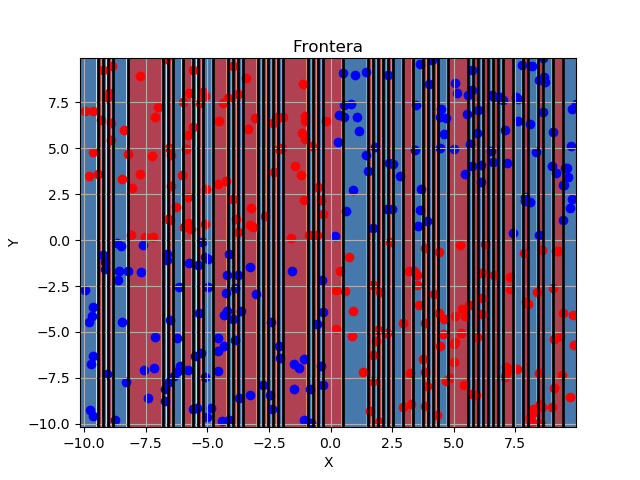

In [6]:
Image(filename="PlotsGenerados/example3.data-clasificador a Vecinos proximos k=1-normalizar=False.png")

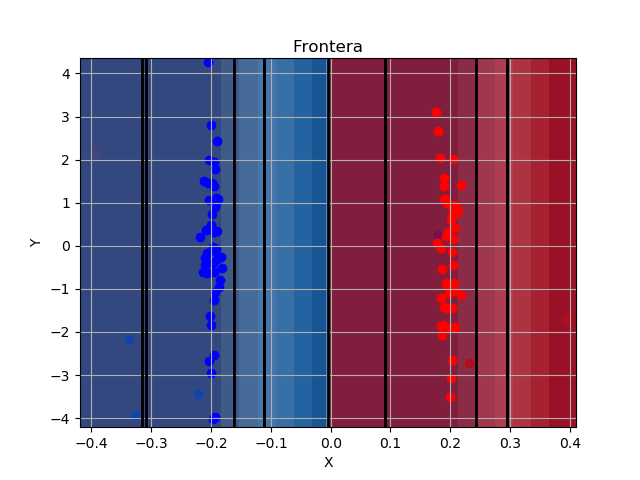

In [8]:
Image(filename="PlotsGenerados/example4.data-clasificador a Vecinos proximos k=1-normalizar=False.png")

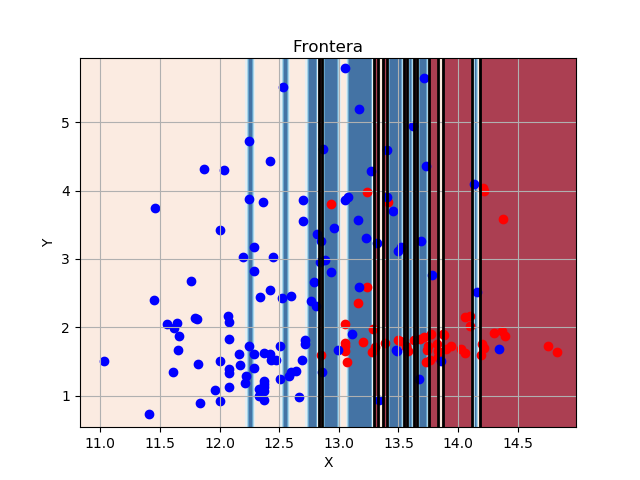

In [9]:
Image(filename="PlotsGenerados/wine_proc.data-clasificador a Vecinos proximos k=1-normalizar=False.png")

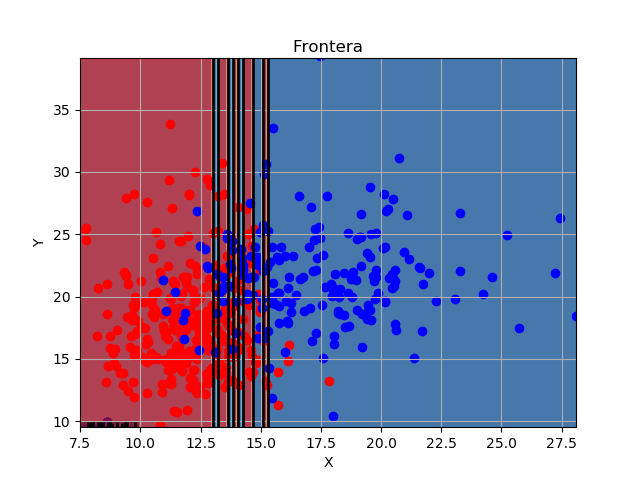

In [10]:
Image(filename="PlotsGenerados/wdbc.data-clasificador a Vecinos proximos k=1-normalizar=False.png")

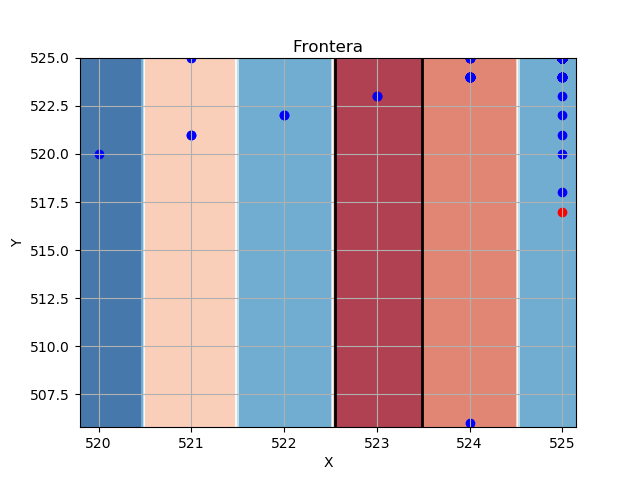

In [11]:
Image(filename="PlotsGenerados/digits.data-clasificador a Vecinos proximos k=1-normalizar=False.png")

------------------------------------

### Apartado 3
Resultados de la clasificación mediante regresión logística en el conjunto de datos propuesto. Comparación con los resultados proporcionados por scikit-learn.

||RegLog<br>Implementada|RegLog<br>Sklearn|RegLog<br>Implementada, normalizar | RegLog<br>Sklearn, normalizar|
|:-----------|:--------------:|:------------------------:|:----------------------:|:-----------------------------:|
| example3   |53.00|53.50|37.00|53.50|
| example4   |0.00|0.00|0.00|0.00|
| wdbc       |36.72|4.91|3.51|1.75|
| wine       |48.95|4.36|3.92|1.11|
| digits     |58.29|11.80|53.40|9.62|

Extraemos las siguientes conclusiones:
* **Sobre sci-kit learn:** Para obtener los resultados de scikit-learn en este apartado hacemos uso del módulo de sklearn `linear_model.LogisticRegression`. Para los casos de 2 clases usaremos el algoritmo `liblinear` ya que los conjuntos de datos no son demasiado grandes. En el caso de los ficheros multiclase, `lbfgs` fue el que nos dio mejor rendimiento. Con `sag` tuvimos problemas con la convergencia y el pre-procesado añadía mucha sobrecarga como para considerar esta opción.

* **Sobre normalización:** Como es lógico al normalizar los datos obtenemos unos porcentajes menores de error ya que los puntos se encuentran todos en el mismo órden de distancia, y al calcular la distancia del punto a la recta es importante que compartan unidades de longitud y medida.

* **example3:** En Example3.data podemos observar en la gráfica como hay 4 nubes de puntos, una en cada cuadrante. Siendo de una clase el cuadrante inferior izquierdo y el superior derecho. Y los otros dos de la otra clase. Por lo tanto con una recta no se pueden divir perfectamente, siempre quedarán la mitad mal clasificados como observamos en los resultados.

* **example4:** Example4.data es un claro ejemplo de un problema linealmente separable, lo podemos observar por la tasa del 0.0% de error, esto significa que los puntos se pueden dividir perfectamente por una recta como se observa en la gráfica.

* **Sobre el número de épocas:** Actualmente usamos 1 época y como constante de aprendizaje 1 y obtenemos unos resultados muy parecidos normalizando a los de scikit-learn excepto en digits.data que obtenemos un error mayor. Podríamos subir el valor del número de épocas para intentar ajustar más el vector W, pero debido al gran número de datos train que tenemos creemos que esta muy ajustado actualmente y no compensa la pérdida de tiempo al subirlo ya que el órden de ejeccución de entrenamiento para regresión logística es: O(num.Atributos x num.Ejemplos x num.Épocas). En digits creemos que si se debería subir a 100 el número de épocas para obtener unos resultados más certeros. 

* **Sobre la constante de aprendizaje:** Respecto a la constante de aprendizaje creemos que 1 dado que solo realizamos una época es un valor apropiado, podríamos reducirla y aumentar el número de épocas para compensar. Reducir la constante de aprendizaje implicaría que va "aprendiendo" más lentamente, es decir, el plano definido por W se mueve de manera más paulatina y lenta, con lo que necesitaremos un número más elevado de épocas para ajustarlo pero podremos conseguir ajustes más precisos. 

**Conclusiones finales: vecinos próximos comparado con regresión logística:**
1. Regresión Logística es un clasificador lineal lo que implica que intenta dividir los datos en 2 partes, y a cada una le asigna una clase. Si los datos están entremezclados o juntos sería mejor utilizar K-NN ya que se trata de un clasificador que puede "aprender" fronteras no lineales al tener en cuenta el número de vecinos próximos. Además de los problemas XOR, que no pueden ser divididos linealmente y por lo tanto el clasificador regresión lógistica no funcionará de manera correcta. 
2. El problema que tiene K-NN es que se necesita utilizar una K adecuada (nosotros probamos con varias como k=1,5,11,21,51), por el contrario en Reg.Log no necesitas modificar los parámetros del algoritmo excepto establecer la constante. de aprendizaje y el número de épocas deseado que suelen ser algo estándart para ciertos tipos de problemas. 
3. K-NN no necesita entrenamiento (solo guardar la tabla con datos) y en costes (órden de ejecucción) está por debajo que Reg.Lineal.
4. Uno de los punto más importante Reg.Log es que nos devuelve un porcentaje de la confianza en la predicción, por el contrario K-NN nos devuelve simplemente la clase mayoritaria. 
5. Como podemos comprobar empíricamente con el ejemplo Digits, K-NN funciona mejor para ejemplos con un número reducido de atributos (dimensionalidad), y necesita bastante memoria para correr al almacenar en Train todos los datos a diferencia de Regresión Logística que solo necesita la necesaria para calcular la multiplicación del vector W con el punto X para obtener la sigmoidal así como guardar el vecto W tras actualizarlo.

Representación de los datos en forma de gráfica. El nombre del gráfico generado es auto-explicativo:

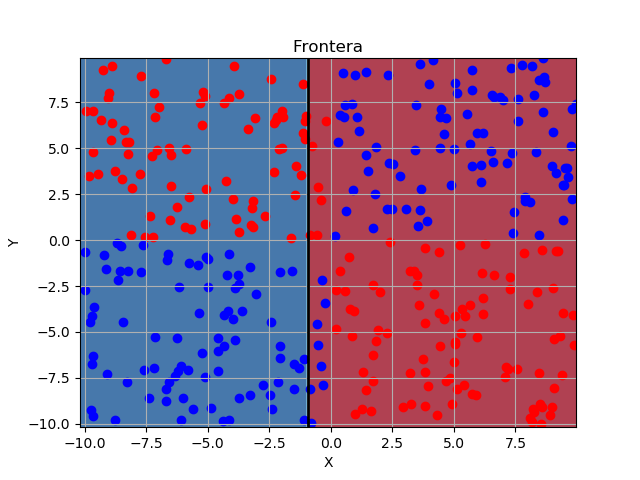

In [22]:
Image(filename="PlotsGenerados/example3.data-clasificador Regresion Logistica-normalizar=False.png")

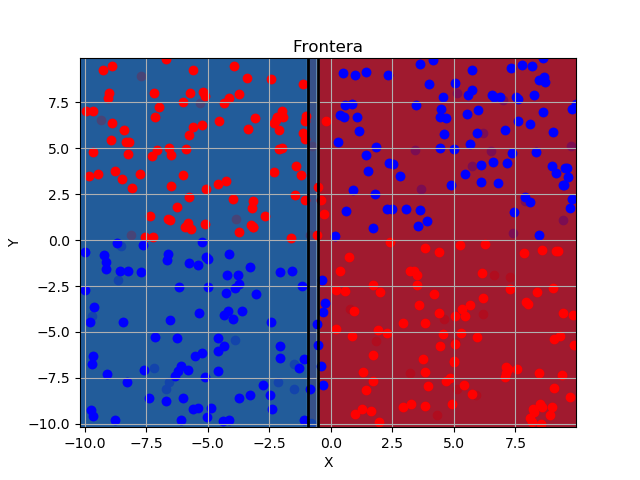

In [24]:
Image(filename="PlotsGenerados/example3.data-clasificador Regresion Logistica, normalizar=True.png")

In [25]:
Image(filename="PlotsGenerados/example4.data-clasificador Regresion Logistica-normalizar=False.png")

In [26]:
Image(filename="PlotsGenerados/example4.data-clasificador Regresion Logistica, normalizar=True.png")

#### A. example3

In [12]:
nEpocas = 1
cteAprendizaje = 1
clasificador = ClasificadorRegresionLogistica(nEpocas, cteAprendizaje)
clasificadorbase = clasificador

data_file = 'example3.data'
about = "clasificador Regresion Logistica"
clf_id = "LogisticRegression"

Main.run(data_file, clasificador, about, ValidacionCruzada(10), 10, True, False, False, True)
Main.runScikit(data_file, clf_id, about, ValidacionCruzada(10),10,True,False, False)


Fichero de datos: example3.data
Laplace =False, normalizar =  False
Estrategia:  ValidacionCruzada , numParticiones:  10
Clasificador:  clasificador Regresion Logistica
Ejecucion: 
=================RESULTADO====================
Array de % de errores obtenidos: [62.500 45.000 62.500 40.000 47.500 62.500 65.000 45.000 40.000 60.000] 
Media de errores total: 53.0 %
Mediana de errores total: 53.75 %
Desviación típica: 9.79795897113 %


===========RESULTADO Scikit-learn==============
Media de errores total: 53.50 % (+/- 13.82 %)


#### B. example3, normalizar

In [13]:
about = "clasificador Regresion Logistica, normalizar"
Main.run(data_file, clasificador, about, ValidacionCruzada(10), 10, True, False, True)
Main.runScikit(data_file, clf_id, about, ValidacionCruzada(10),10,True,False, True)


Fichero de datos: example3.data
Laplace =False, normalizar =  True
Estrategia:  ValidacionCruzada , numParticiones:  10
Clasificador:  clasificador Regresion Logistica, normalizar
Ejecucion: 
=================RESULTADO====================
Array de % de errores obtenidos: [32.500 30.000 47.500 30.000 25.000 30.000 30.000 40.000 40.000 65.000] 
Media de errores total: 37.0 %
Mediana de errores total: 31.25 %
Desviación típica: 11.2805141727 %


===========RESULTADO Scikit-learn==============
Media de errores total: 53.50 % (+/- 13.82 %)


#### C. example4

In [14]:
data_file = 'example4.data'
about = "clasificador Regresion Logistica"

Main.run(data_file, clasificador, about, ValidacionCruzada(10), 10, True, False, False, True)
Main.runScikit(data_file, clf_id, about, ValidacionCruzada(10),10,True,False, False)


Fichero de datos: example4.data
Laplace =False, normalizar =  False
Estrategia:  ValidacionCruzada , numParticiones:  10
Clasificador:  clasificador Regresion Logistica
Ejecucion: 
=================RESULTADO====================
Array de % de errores obtenidos: [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 
Media de errores total: 0.0 %
Mediana de errores total: 0.0 %
Desviación típica: 0.0 %


===========RESULTADO Scikit-learn==============
Media de errores total: 0.00 % (+/- 0.00 %)


#### D. example4, normalizar

In [15]:
about = "clasificador Regresion Logistica, normalizar"
Main.run(data_file, clasificador, about, ValidacionCruzada(10), 10, True, False, True)
Main.runScikit(data_file, clf_id, about, ValidacionCruzada(10),10,True,False, True)


Fichero de datos: example4.data
Laplace =False, normalizar =  True
Estrategia:  ValidacionCruzada , numParticiones:  10
Clasificador:  clasificador Regresion Logistica, normalizar
Ejecucion: 
=================RESULTADO====================
Array de % de errores obtenidos: [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 
Media de errores total: 0.0 %
Mediana de errores total: 0.0 %
Desviación típica: 0.0 %


===========RESULTADO Scikit-learn==============
Media de errores total: 0.00 % (+/- 0.00 %)


#### E. wdbc

In [16]:
data_file = 'wdbc.data'
about = "clasificador Regresion Logistica"

Main.run(data_file, clasificador, about, ValidacionCruzada(10), 10, True, False, False, True)
Main.runScikit(data_file, clf_id, about, ValidacionCruzada(10),10,True,False, False)


Fichero de datos: wdbc.data
Laplace =False, normalizar =  False
Estrategia:  ValidacionCruzada , numParticiones:  10
Clasificador:  clasificador Regresion Logistica
Ejecucion: 
=================RESULTADO====================
Array de % de errores obtenidos: [36.842 43.860 35.088 31.579 36.842 42.105 36.842 28.070 40.351 35.714] 
Media de errores total: 36.7293233083 %
Mediana de errores total: 36.8421052632 %
Desviación típica: 4.45116239346 %


===========RESULTADO Scikit-learn==============
Media de errores total: 4.91 % (+/- 3.70 %)


#### F. wdbc, normalizar

In [17]:
about = "clasificador Regresion Logistica, normalizar"
Main.run(data_file, clasificador, about, ValidacionCruzada(10), 10, True, False, True)
Main.runScikit(data_file, clf_id, about, ValidacionCruzada(10),10,True,False, True)


Fichero de datos: wdbc.data
Laplace =False, normalizar =  True
Estrategia:  ValidacionCruzada , numParticiones:  10
Clasificador:  clasificador Regresion Logistica, normalizar
Ejecucion: 
=================RESULTADO====================
Array de % de errores obtenidos: [3.509 1.754 7.018 1.754 0.000 5.263 3.509 3.509 7.018 1.786] 
Media de errores total: 3.5119047619 %
Mediana de errores total: 3.50877192982 %
Desviación típica: 2.21668403718 %


===========RESULTADO Scikit-learn==============
Media de errores total: 1.75 % (+/- 2.72 %)


#### G. wine

In [18]:
clasificador = ClasificadorMulticlase(clasificadorbase)
data_file = 'wine_proc.data'
about = "clasificador RL Multiclase"
clf_id = "LRMulticlass"

Main.run(data_file, clasificador, about, ValidacionCruzada(10), 10, True, False, False, True)
Main.runScikit(data_file, clf_id, about, ValidacionCruzada(10),10,True,False, False)


Fichero de datos: wine_proc.data
Laplace =False, normalizar =  False
Estrategia:  ValidacionCruzada , numParticiones:  10
Clasificador:  clasificador RL Multiclase
Ejecucion: 
=================RESULTADO====================
Array de % de errores obtenidos: [50.000 44.444 38.889 50.000 50.000 66.667 27.778 50.000 52.941 58.824] 
Media de errores total: 48.954248366 %
Mediana de errores total: 50.0 %
Desviación típica: 10.0074729649 %


===========RESULTADO Scikit-learn==============
Media de errores total: 4.36 % (+/- 10.50 %)


#### H. wine, normalizar

In [19]:
about = "clasificador RL Multiclase, normalizar"
Main.run(data_file, clasificador, about, ValidacionCruzada(10), 10, True, False, True)
Main.runScikit(data_file, clf_id, about, ValidacionCruzada(10),10,True,False, True)


Fichero de datos: wine_proc.data
Laplace =False, normalizar =  True
Estrategia:  ValidacionCruzada , numParticiones:  10
Clasificador:  clasificador RL Multiclase, normalizar
Ejecucion: 
=================RESULTADO====================
Array de % de errores obtenidos: [11.111 11.111 5.556 0.000 0.000 0.000 0.000 5.556 0.000 5.882] 
Media de errores total: 3.92156862745 %
Mediana de errores total: 2.77777777778 %
Desviación típica: 4.35266638321 %


===========RESULTADO Scikit-learn==============
Media de errores total: 1.11 % (+/- 4.44 %)


#### I. digits

In [20]:
data_file = 'digits.data'

about = "clasificador Regresion Logistica"
Main.run(data_file, clasificador, about, ValidacionCruzada(10), 10, True, False, False, True)
Main.runScikit(data_file, clf_id, about, ValidacionCruzada(10),10,True,False, False)


Fichero de datos: digits.data
Laplace =False, normalizar =  False
Estrategia:  ValidacionCruzada , numParticiones:  10
Clasificador:  clasificador Regresion Logistica
Ejecucion: 
=================RESULTADO====================
Array de % de errores obtenidos: [64.894 48.936 58.511 51.064 74.468 54.255 63.830 59.574 45.745 61.702] 
Media de errores total: 58.2978723404 %
Mediana de errores total: 59.0425531915 %
Desviación típica: 8.14090488073 %


===========RESULTADO Scikit-learn==============
Media de errores total: 11.80 % (+/- 11.49 %)


#### J. digits, normalizar

In [21]:
about = "clasificador RL Multiclase, normalizar"
Main.run(data_file, clasificador, about, ValidacionCruzada(10), 10, True, False, True)
Main.runScikit(data_file, clf_id, about, ValidacionCruzada(10),10,True,False, True)


Fichero de datos: digits.data
Laplace =False, normalizar =  True
Estrategia:  ValidacionCruzada , numParticiones:  10
Clasificador:  clasificador RL Multiclase, normalizar
Ejecucion: 
=================RESULTADO====================
Array de % de errores obtenidos: [45.745 58.511 47.872 56.383 52.128 63.830 52.128 56.383 60.638 40.426] 
Media de errores total: 53.4042553191 %
Mediana de errores total: 54.2553191489 %
Desviación típica: 6.82511273717 %


===========RESULTADO Scikit-learn==============
Media de errores total: 9.62 % (+/- 9.03 %)


------------------------------------